In [2]:
import pandas as pd
import pickle
from collections import Counter
import glob
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn import ensemble
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")


Document Embedding

In [2]:
import gensim

from gensim.models.doc2vec import Doc2Vec,LabeledSentence

C:\Users\zxy\Anaconda3\lib\site-packages\gensim-3.4.0-py3.6-win-amd64.egg\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
import numpy as np

import pickle

mer=pickle.load(open('cc_merged_0429.pkl',"rb"))

from gensim.models import doc2vec
from collections import namedtuple

# Load data

# Transform data (you can add more data preprocessing steps) 

docs = []
analyzedDocument = namedtuple('AnalyzedDocument', 'words tags')
for i, text in enumerate(mer.txt):
    words = text.lower().split()
    tags = [i]
    docs.append(analyzedDocument(words, tags))

# Train model (set min_count = 1, if you want the model to work with the provided example data set)

model = doc2vec.Doc2Vec(docs, size = 25, window = 10, min_count = 1, workers = 4)

# Get the vectors

model.docvecs[0]
model.docvecs[1]


C:\Users\zxy\Anaconda3\lib\site-packages\gensim-3.4.0-py3.6-win-amd64.egg\gensim\models\doc2vec.py:366: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


array([ 0.43783331,  2.06801486,  0.53648782,  0.43270174, -0.98655158,
        1.65624988, -0.06916815, -0.73676074, -0.4503608 ,  0.32821459,
        0.9090364 ,  0.23109597,  0.78079277, -0.40345684,  0.14013301,
        0.65005356, -0.18434927,  0.58185804,  0.11211506, -1.18564868,
       -0.41236639, -0.07018057, -0.92799979,  0.9965834 ,  0.53326535], dtype=float32)

In [ ]:

arr=np.zeros((8434,25))

for i in range(len(docs)):
    arr[i]=model.docvecs[i]
for i in range(1,26):
    mer[str(i)]=None

col=[str(x) for x in list(range(1,26))]

mer[col]=pd.DataFrame(arr)


In [5]:
mer.to_pickle('documentvec25.pkl')

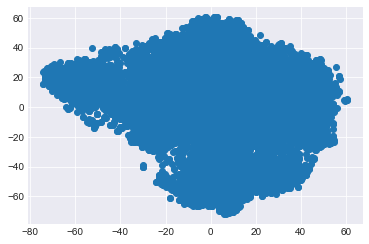

In [8]:
from sklearn.manifold import TSNE
X = model[model.wv.vocab]
X=model[list(range(8434))]
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.show()

Reduced Model

In [4]:
###Read in data
rf=pd.read_csv('bio_txt.csv')

In [5]:
list(rf)

['Unnamed: 0',
 'index',
 'x_dem_dm',
 'x_republican_dm',
 'x_instate_ba_dm',
 'x_elev_dm',
 'x_unity_dm',
 'x_aba_dm',
 'x_crossa_dm',
 'x_pfedjdge_dm',
 'x_pindreg1_dm',
 'x_plawprof_dm',
 'x_pscab_dm',
 'x_pcab_dm',
 'x_pusa_dm',
 'x_pssenate_dm',
 'x_paag_dm',
 'x_psp_dm',
 'x_pslc_dm',
 'x_pssc_dm',
 'x_pshouse_dm',
 'x_psg_dm',
 'x_psgo_dm',
 'x_psenate_dm',
 'x_psatty_dm',
 'x_pprivate_dm',
 'x_pmayor_dm',
 'x_plocct_dm',
 'x_phouse_dm',
 'x_pgov_dm',
 'x_pda_dm',
 'x_pcc_dm',
 'x_pccoun_dm',
 'x_pausa_dm',
 'x_pasatty_dm',
 'x_pag_dm',
 'x_pada_dm',
 'x_pgovt_dm',
 'x_llm_sjd_dm',
 'x_protestant_dm',
 'x_evangelical_dm',
 'x_mainline_dm',
 'x_noreligion_dm',
 'x_catholic_dm',
 'x_jewish_dm',
 'x_black_dm',
 'x_nonwhite_dm',
 'x_female_dm',
 'x_jd_public_dm',
 'x_ba_public_dm',
 'x_b10s_dm',
 'x_b20s_dm',
 'x_b30s_dm',
 'x_b40s_dm',
 'x_b50s_dm',
 'x_pbank_dm',
 'x_pmag_dm',
 'x_ageon40s_dm',
 'x_ageon50s_dm',
 'x_ageon60s_dm',
 'x_ageon40orless_dm',
 'x_ageon70ormore_dm',
 'x_p

In [6]:
##Select predictor variable and target variable
cols=[col for col in rf if col.startswith('x_')]
X=rf[cols]
Y=rf.length_3m_dif

##Rescale to Normalize
n_X=(X-X.min())/(X.max()-X.min())
n_y=(Y-Y.min())/(Y.max()-Y.min())

##Split Data
X_train, X_test, y_train, y_test = train_test_split(n_X, n_y, test_size=0.25, random_state=42)

##Add a Bias Variable
X_train=np.hstack((X_train,np.ones((X_train.shape[0],1))))
X_test=np.hstack((X_test,np.ones((X_test.shape[0],1))))


In [7]:
import torch
import numpy as np
from torch.autograd import Variable
import torch.nn.functional as F

import torch.utils.data as Data

In [8]:

x_train = torch.from_numpy(np.nan_to_num(X_train))
y_train = torch.from_numpy(y_train.values)
x_test = torch.from_numpy(np.nan_to_num(X_test))
y_test = torch.from_numpy(y_test.values)
x_test = Variable(x_test.float())
y_test = Variable(y_test.float())


In [9]:
class Net(torch.nn.Module):
    def __init__(self, n_features, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden=torch.nn.Linear(n_features,n_hidden) 
        self.hidden2 = torch.nn.Linear(n_hidden, n_hidden)
        self.predict=torch.nn.Linear(n_hidden,1) 
    def forward(self,x):
        x=F.relu(self.hidden(x)) 
        x=self.hidden2(x)
        x=self.predict(x) 
        return x

In [11]:
net = Net(72, 50, 1)

In [14]:
optimizer=torch.optim.SGD(net.parameters(),lr=0.01)
loss_func=torch.nn.MSELoss()

In [12]:
BATCH_SIZE = 100
dataset_train = Data.TensorDataset(data_tensor = x_train, target_tensor = y_train)
train_loader = Data.DataLoader(
    dataset = dataset_train,
    batch_size = BATCH_SIZE,
    shuffle = True,
    num_workers = 0,)

In [15]:
#find optimal training epoch
for epoch in range(43):
    for step, (batch_x, batch_y) in enumerate(train_loader):
        
        x = Variable(batch_x.float())
        y = Variable(batch_y.float())
        
        optimizer.zero_grad()
        prediction = net(x)
        train_loss = loss_func(prediction, y)
        print('Epoch:', epoch, ' Step: ', step,' training loss: ',train_loss.data[0])        
        train_loss.backward()
        optimizer.step()

Epoch: 0  Step:  0  training loss:  0.8170713186264038
Epoch: 0  Step:  1  training loss:  0.7293936014175415
Epoch: 0  Step:  2  training loss:  0.6572001576423645
Epoch: 0  Step:  3  training loss:  0.578026533126831
Epoch: 0  Step:  4  training loss:  0.5130570530891418
Epoch: 0  Step:  5  training loss:  0.45738497376441956
Epoch: 0  Step:  6  training loss:  0.40658116340637207
Epoch: 0  Step:  7  training loss:  0.3501603305339813
Epoch: 0  Step:  8  training loss:  0.3137766122817993
Epoch: 0  Step:  9  training loss:  0.2848190665245056
Epoch: 0  Step:  10  training loss:  0.24920740723609924
Epoch: 0  Step:  11  training loss:  0.21098659932613373
Epoch: 0  Step:  12  training loss:  0.1983512043952942
Epoch: 0  Step:  13  training loss:  0.16883903741836548
Epoch: 0  Step:  14  training loss:  0.1468013972043991
Epoch: 0  Step:  15  training loss:  0.12663093209266663
Epoch: 0  Step:  16  training loss:  0.11510252207517624
Epoch: 0  Step:  17  training loss:  0.0999459102749

Epoch: 2  Step:  50  training loss:  0.0019039011094719172
Epoch: 2  Step:  51  training loss:  0.0019283993169665337
Epoch: 2  Step:  52  training loss:  0.0036831723991781473
Epoch: 2  Step:  53  training loss:  0.0019669223111122847
Epoch: 2  Step:  54  training loss:  0.0038354701828211546
Epoch: 2  Step:  55  training loss:  0.0025010849349200726
Epoch: 3  Step:  0  training loss:  0.002339285798370838
Epoch: 3  Step:  1  training loss:  0.002536910818889737
Epoch: 3  Step:  2  training loss:  0.002116608899086714
Epoch: 3  Step:  3  training loss:  0.002417808398604393
Epoch: 3  Step:  4  training loss:  0.0023977227974683046
Epoch: 3  Step:  5  training loss:  0.0030602100305259228
Epoch: 3  Step:  6  training loss:  0.002695603994652629
Epoch: 3  Step:  7  training loss:  0.002660982543602586
Epoch: 3  Step:  8  training loss:  0.009179593063890934
Epoch: 3  Step:  9  training loss:  0.0026477212086319923
Epoch: 3  Step:  10  training loss:  0.0021847859025001526
Epoch: 3  Step

Epoch: 5  Step:  55  training loss:  0.002301314380019903
Epoch: 6  Step:  0  training loss:  0.0024493595119565725
Epoch: 6  Step:  1  training loss:  0.00219606957398355
Epoch: 6  Step:  2  training loss:  0.002538016065955162
Epoch: 6  Step:  3  training loss:  0.0022828225046396255
Epoch: 6  Step:  4  training loss:  0.002274517435580492
Epoch: 6  Step:  5  training loss:  0.0026751807890832424
Epoch: 6  Step:  6  training loss:  0.002855512546375394
Epoch: 6  Step:  7  training loss:  0.009088286198675632
Epoch: 6  Step:  8  training loss:  0.0021637100726366043
Epoch: 6  Step:  9  training loss:  0.002317847218364477
Epoch: 6  Step:  10  training loss:  0.002448524348437786
Epoch: 6  Step:  11  training loss:  0.0023989409673959017
Epoch: 6  Step:  12  training loss:  0.0029308677185326815
Epoch: 6  Step:  13  training loss:  0.0022653352934867144
Epoch: 6  Step:  14  training loss:  0.00413482403382659
Epoch: 6  Step:  15  training loss:  0.0020275407005101442
Epoch: 6  Step:  1

Epoch: 9  Step:  17  training loss:  0.0025119977071881294
Epoch: 9  Step:  18  training loss:  0.0027313537430018187
Epoch: 9  Step:  19  training loss:  0.0026102191768586636
Epoch: 9  Step:  20  training loss:  0.0023908503353595734
Epoch: 9  Step:  21  training loss:  0.0027086352929472923
Epoch: 9  Step:  22  training loss:  0.001980252331122756
Epoch: 9  Step:  23  training loss:  0.002485585166141391
Epoch: 9  Step:  24  training loss:  0.0028186982963234186
Epoch: 9  Step:  25  training loss:  0.0027758656069636345
Epoch: 9  Step:  26  training loss:  0.002883714158087969
Epoch: 9  Step:  27  training loss:  0.0022564842365682125
Epoch: 9  Step:  28  training loss:  0.0032133308704942465
Epoch: 9  Step:  29  training loss:  0.0018774239579215646
Epoch: 9  Step:  30  training loss:  0.00285350251942873
Epoch: 9  Step:  31  training loss:  0.00280217407271266
Epoch: 9  Step:  32  training loss:  0.0027617064770311117
Epoch: 9  Step:  33  training loss:  0.005745834670960903
Epoch

Epoch: 12  Step:  26  training loss:  0.0023127070162445307
Epoch: 12  Step:  27  training loss:  0.0025680253747850657
Epoch: 12  Step:  28  training loss:  0.002109838416799903
Epoch: 12  Step:  29  training loss:  0.0029968679882586002
Epoch: 12  Step:  30  training loss:  0.0023792015854269266
Epoch: 12  Step:  31  training loss:  0.001341316499747336
Epoch: 12  Step:  32  training loss:  0.0022129679564386606
Epoch: 12  Step:  33  training loss:  0.0019459958421066403
Epoch: 12  Step:  34  training loss:  0.002441767370328307
Epoch: 12  Step:  35  training loss:  0.0020173636730760336
Epoch: 12  Step:  36  training loss:  0.0030101758893579245
Epoch: 12  Step:  37  training loss:  0.008623430505394936
Epoch: 12  Step:  38  training loss:  0.0058101569302380085
Epoch: 12  Step:  39  training loss:  0.0029015729669481516
Epoch: 12  Step:  40  training loss:  0.0024463958106935024
Epoch: 12  Step:  41  training loss:  0.0028639959637075663
Epoch: 12  Step:  42  training loss:  0.0018

Epoch: 15  Step:  48  training loss:  0.0023537343367934227
Epoch: 15  Step:  49  training loss:  0.0032178061082959175
Epoch: 15  Step:  50  training loss:  0.0019394881092011929
Epoch: 15  Step:  51  training loss:  0.001891412539407611
Epoch: 15  Step:  52  training loss:  0.008328999392688274
Epoch: 15  Step:  53  training loss:  0.0029230332002043724
Epoch: 15  Step:  54  training loss:  0.0021525619085878134
Epoch: 15  Step:  55  training loss:  0.002258995547890663
Epoch: 16  Step:  0  training loss:  0.0034727391321212053
Epoch: 16  Step:  1  training loss:  0.0027744865510612726
Epoch: 16  Step:  2  training loss:  0.0028061559423804283
Epoch: 16  Step:  3  training loss:  0.002030694857239723
Epoch: 16  Step:  4  training loss:  0.0031398290302604437
Epoch: 16  Step:  5  training loss:  0.0028393480461090803
Epoch: 16  Step:  6  training loss:  0.002007592935115099
Epoch: 16  Step:  7  training loss:  0.0017952510388568044
Epoch: 16  Step:  8  training loss:  0.00349513674154

Epoch: 19  Step:  19  training loss:  0.002485483419150114
Epoch: 19  Step:  20  training loss:  0.0022862206678837538
Epoch: 19  Step:  21  training loss:  0.0024279390927404165
Epoch: 19  Step:  22  training loss:  0.002008653711527586
Epoch: 19  Step:  23  training loss:  0.002114620991051197
Epoch: 19  Step:  24  training loss:  0.0019408927764743567
Epoch: 19  Step:  25  training loss:  0.0031113869044929743
Epoch: 19  Step:  26  training loss:  0.002616496291011572
Epoch: 19  Step:  27  training loss:  0.00239726435393095
Epoch: 19  Step:  28  training loss:  0.0021491744555532932
Epoch: 19  Step:  29  training loss:  0.0020947821903973818
Epoch: 19  Step:  30  training loss:  0.00235526985488832
Epoch: 19  Step:  31  training loss:  0.0024839676916599274
Epoch: 19  Step:  32  training loss:  0.0025912874843925238
Epoch: 19  Step:  33  training loss:  0.0030254933517426252
Epoch: 19  Step:  34  training loss:  0.002777143381536007
Epoch: 19  Step:  35  training loss:  0.002318295

Epoch: 23  Step:  2  training loss:  0.0025671408511698246
Epoch: 23  Step:  3  training loss:  0.002543604001402855
Epoch: 23  Step:  4  training loss:  0.005031692795455456
Epoch: 23  Step:  5  training loss:  0.003235416952520609
Epoch: 23  Step:  6  training loss:  0.0025680148974061012
Epoch: 23  Step:  7  training loss:  0.0030415253713726997
Epoch: 23  Step:  8  training loss:  0.0032087001018226147
Epoch: 23  Step:  9  training loss:  0.0035331568215042353
Epoch: 23  Step:  10  training loss:  0.001807070104405284
Epoch: 23  Step:  11  training loss:  0.002690173452720046
Epoch: 23  Step:  12  training loss:  0.0019258154788985848
Epoch: 23  Step:  13  training loss:  0.0025249761529266834
Epoch: 23  Step:  14  training loss:  0.0022590074222534895
Epoch: 23  Step:  15  training loss:  0.0018841278506442904
Epoch: 23  Step:  16  training loss:  0.0031545122619718313
Epoch: 23  Step:  17  training loss:  0.0027133142575621605
Epoch: 23  Step:  18  training loss:  0.0023954643402

Epoch: 26  Step:  6  training loss:  0.0037005115300416946
Epoch: 26  Step:  7  training loss:  0.002924563828855753
Epoch: 26  Step:  8  training loss:  0.0021479306742548943
Epoch: 26  Step:  9  training loss:  0.002099674893543124
Epoch: 26  Step:  10  training loss:  0.0026621082797646523
Epoch: 26  Step:  11  training loss:  0.0028346737381070852
Epoch: 26  Step:  12  training loss:  0.0024588247761130333
Epoch: 26  Step:  13  training loss:  0.001804710947908461
Epoch: 26  Step:  14  training loss:  0.003369646379724145
Epoch: 26  Step:  15  training loss:  0.001965655479580164
Epoch: 26  Step:  16  training loss:  0.0019598216749727726
Epoch: 26  Step:  17  training loss:  0.00348351476714015
Epoch: 26  Step:  18  training loss:  0.0021934593096375465
Epoch: 26  Step:  19  training loss:  0.0023026985581964254
Epoch: 26  Step:  20  training loss:  0.002304958878085017
Epoch: 26  Step:  21  training loss:  0.001998433843255043
Epoch: 26  Step:  22  training loss:  0.0018588149687

Epoch: 29  Step:  36  training loss:  0.004325965419411659
Epoch: 29  Step:  37  training loss:  0.002302564214915037
Epoch: 29  Step:  38  training loss:  0.0026019797660410404
Epoch: 29  Step:  39  training loss:  0.0025373019743710756
Epoch: 29  Step:  40  training loss:  0.002220015972852707
Epoch: 29  Step:  41  training loss:  0.002614931669086218
Epoch: 29  Step:  42  training loss:  0.003099780296906829
Epoch: 29  Step:  43  training loss:  0.0027328806463629007
Epoch: 29  Step:  44  training loss:  0.0027000552508980036
Epoch: 29  Step:  45  training loss:  0.0018126931972801685
Epoch: 29  Step:  46  training loss:  0.002921626903116703
Epoch: 29  Step:  47  training loss:  0.0023152458015829325
Epoch: 29  Step:  48  training loss:  0.00211234949529171
Epoch: 29  Step:  49  training loss:  0.0028322325088083744
Epoch: 29  Step:  50  training loss:  0.002479689894244075
Epoch: 29  Step:  51  training loss:  0.0025033249985426664
Epoch: 29  Step:  52  training loss:  0.002682728

Epoch: 32  Step:  30  training loss:  0.0025309831835329533
Epoch: 32  Step:  31  training loss:  0.002688483102247119
Epoch: 32  Step:  32  training loss:  0.0017398069612681866
Epoch: 32  Step:  33  training loss:  0.0027551616076380014
Epoch: 32  Step:  34  training loss:  0.0022353054955601692
Epoch: 32  Step:  35  training loss:  0.0027941567823290825
Epoch: 32  Step:  36  training loss:  0.0020378895569592714
Epoch: 32  Step:  37  training loss:  0.003378558438271284
Epoch: 32  Step:  38  training loss:  0.0021508808713406324
Epoch: 32  Step:  39  training loss:  0.00852044578641653
Epoch: 32  Step:  40  training loss:  0.001690467121079564
Epoch: 32  Step:  41  training loss:  0.0030012831557542086
Epoch: 32  Step:  42  training loss:  0.0035614364314824343
Epoch: 32  Step:  43  training loss:  0.003978474996984005
Epoch: 32  Step:  44  training loss:  0.002136467257514596
Epoch: 32  Step:  45  training loss:  0.0025297862011939287
Epoch: 32  Step:  46  training loss:  0.0027954

Epoch: 36  Step:  6  training loss:  0.0024282140657305717
Epoch: 36  Step:  7  training loss:  0.002192959189414978
Epoch: 36  Step:  8  training loss:  0.002646883949637413
Epoch: 36  Step:  9  training loss:  0.0028311305213719606
Epoch: 36  Step:  10  training loss:  0.0029772883281111717
Epoch: 36  Step:  11  training loss:  0.0017994069494307041
Epoch: 36  Step:  12  training loss:  0.002369266003370285
Epoch: 36  Step:  13  training loss:  0.0038439854979515076
Epoch: 36  Step:  14  training loss:  0.0020582827273756266
Epoch: 36  Step:  15  training loss:  0.001969297882169485
Epoch: 36  Step:  16  training loss:  0.0028555116150528193
Epoch: 36  Step:  17  training loss:  0.0025107190012931824
Epoch: 36  Step:  18  training loss:  0.0026035986375063658
Epoch: 36  Step:  19  training loss:  0.0024523409083485603
Epoch: 36  Step:  20  training loss:  0.0036377599462866783
Epoch: 36  Step:  21  training loss:  0.006178287789225578
Epoch: 36  Step:  22  training loss:  0.002449600

Epoch: 39  Step:  10  training loss:  0.0025227402802556753
Epoch: 39  Step:  11  training loss:  0.0025760724674910307
Epoch: 39  Step:  12  training loss:  0.0021322262473404408
Epoch: 39  Step:  13  training loss:  0.0020670839585363865
Epoch: 39  Step:  14  training loss:  0.00604125065729022
Epoch: 39  Step:  15  training loss:  0.0027200374752283096
Epoch: 39  Step:  16  training loss:  0.002177854534238577
Epoch: 39  Step:  17  training loss:  0.002178773982450366
Epoch: 39  Step:  18  training loss:  0.002414335496723652
Epoch: 39  Step:  19  training loss:  0.002555476501584053
Epoch: 39  Step:  20  training loss:  0.002847104100510478
Epoch: 39  Step:  21  training loss:  0.001729257288388908
Epoch: 39  Step:  22  training loss:  0.0019990585278719664
Epoch: 39  Step:  23  training loss:  0.0022551019210368395
Epoch: 39  Step:  24  training loss:  0.003037111833691597
Epoch: 39  Step:  25  training loss:  0.0031667116563767195
Epoch: 39  Step:  26  training loss:  0.001798349

In [16]:
prediction = net(x_test)

In [17]:
r2_score(y_test.data, prediction.data)

-0.13430915520419529

In [18]:
mean_squared_error(y_test.data, prediction.data)

0.0023677375

In [20]:
## RF

##Split Data
X_train, X_test, y_train, y_test = train_test_split(n_X, n_y, test_size=0.25, random_state=42)

##Add a Bias Variable
X_train=np.hstack((X_train,np.ones((X_train.shape[0],1))))
X_test=np.hstack((X_test,np.ones((X_test.shape[0],1))))

X = np.nan_to_num(X_train)
y = y_train.values
regr = RandomForestRegressor(max_depth=11, random_state=42,n_estimators=100)
regr.fit(X, y)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=11,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [21]:

##Get R^2 and MSE error
print('R^2 of best reduced form regressor model: ',r2_score(y_test.values, regr.predict(np.nan_to_num(X_test))))
##0.106690850879

print('MSE of best reduced form regressor model: ',mean_squared_error(y_test.values, regr.predict(np.nan_to_num(X_test))))
##0.00185661687535

R^2 of best reduced form regressor model:  0.0685188891493
MSE of best reduced form regressor model:  0.00194435739202


In [22]:
np.mean(regr.predict(np.nan_to_num(X_test)))

0.81260553902315136

In [23]:
np.std(regr.predict(np.nan_to_num(X_test)))

0.01457440800938045

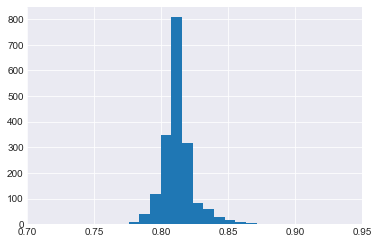

In [24]:
plt.hist(regr.predict(np.nan_to_num(X_test)), bins=50)  # arguments are passed to np.histogram
plt.xlim(xmin=0.7, xmax = 0.95)
plt.show()

In [8]:

# Print Top 10 Feature Importance
d=(sorted(zip(map(lambda x: round(x, 10), regr.feature_importances_), list(rf[cols].columns)+['intercept']), 
             reverse=True))
print('feature_importances:')
importances=[]
features=[]
for (i,j) in d[:10]:
    importances.append(i)
    features.append(j)
    print(j,i)


feature_importances:
x_instate_ba_dm 0.069308686
x_b10s_dm 0.0479696634
x_mainline_dm 0.0467233361
x_sdem_dm 0.0433034768
x_pssenate_dm 0.0429862463
x_ageon40orless_dm 0.039850547
x_agecommi_dm 0.0285297318
x_unity_dm 0.0283212245
x_pgovt_dm 0.0237391068
x_b20s_dm 0.0235830425


In [11]:
corr = rf.corr()

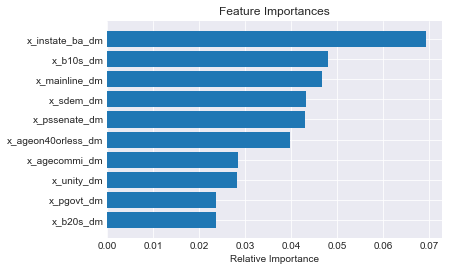

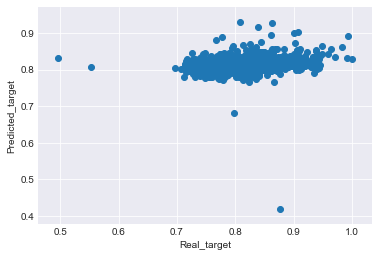

In [22]:
## Plot feature importances
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(d[:10])), importances[::-1], align='center')
plt.yticks(range(len(d[:10])), features[::-1])
plt.xlabel('Relative Importance')
plt.show()

## Plot Real vs Predicted scatter plot
plt.scatter(y_test.values,regr.predict(np.nan_to_num(X_test)))
plt.xlabel('Real_target')
plt.ylabel('Predicted_target')
plt.show()

In [17]:

########this is when turning this into classification problem by categorize sentencing length changes

##Catergorize feature
def cat(v):
    if v>(-0.5) and v<0.5:
        return 0
    elif v>=0.5:
        return 1
    else:
        return -1
    
X=rf[['1',
       '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24','25']]

Y=rf.length_3m_dif

##Catergorize feature
Y=Y.apply(cat)
##Rescale to Normalize
n_X=(X-X.min())/(X.max()-X.min())

##Train Test Split
X_train, X_test, y_train, y_test = train_test_split(n_X, Y, test_size=0.25, random_state=42)   


X = np.nan_to_num(X_train)
y = y_train.values
##Build Classifier
classifier =ensemble.GradientBoostingClassifier(max_depth=5)
classifier.fit(X,y)

##Get predicted category
y_pred = classifier.predict(np.nan_to_num(X_test))
reversefactor = dict(zip([-1,0,1],['Decrease','NotChanged','Increase']))
y_testing = np.vectorize(reversefactor.get)(y_test)
y_pred = np.vectorize(reversefactor.get)(y_pred)

In [28]:

# Making the Confusion Matrix
print(pd.crosstab(y_testing, y_pred, rownames=['Actual'], colnames=['Predicted']))
print('F1 Score is: ',f1_score(y_testing, y_pred, labels=None, average='micro', sample_weight=None))


Predicted   Decrease  Increase  NotChanged
Actual                                    
Decrease         270       270          55
Increase         186       511          86
NotChanged       114       217         138
F1 Score is:  0.497563616676


In [15]:
inference_data = pd.read_csv('bio_txt2.csv')

rf=inference_data[['1',
       '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24','25','length_3m_dif']]

In [17]:

########this is when turning this into classification problem by categorize sentencing length changes

##Catergorize feature
def cat(v):
    if v>(-0.5) and v<0.5:
        return 0
    elif v>=0.5:
        return 1
    else:
        return -1
    
X=rf[['1',
       '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24','25']]

Y=rf.length_3m_dif

##Catergorize feature
Y=Y.apply(cat)
##Rescale to Normalize
n_X=(X-X.min())/(X.max()-X.min())

##Train Test Split
X_train, X_test, y_train, y_test = train_test_split(n_X, Y, test_size=0.25, random_state=42)   


X = np.nan_to_num(X_train)
y = y_train.values
##Build Classifier
classifier =ensemble.GradientBoostingClassifier(max_depth=5)
classifier.fit(X,y)

##Get predicted category
y_pred = classifier.predict(np.nan_to_num(X_test))
reversefactor = dict(zip([-1,0,1],['Decrease','NotChanged','Increase']))
y_testing = np.vectorize(reversefactor.get)(y_test)
y_pred = np.vectorize(reversefactor.get)(y_pred)

In [18]:
#Making the Confusion Matrix
print(pd.crosstab(y_testing, y_pred, rownames=['Actual'], colnames=['Predicted']))
print('F1 Score is: ',f1_score(y_testing, y_pred, labels=None, average='micro', sample_weight=None))


Predicted   Decrease  Increase  NotChanged
Actual                                    
Decrease         195       361          39
Increase         217       522          44
NotChanged       126       322          21
F1 Score is:  0.399566865187
